<a href="https://colab.research.google.com/github/hahajjjun/Bioinformatics_Algorithm/blob/master/Dynamic_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Prerequisites : Recursive Calls & Memoization

In [ ]:
import time

최적의 하위 구조? <br/>
- 어떤 문제의 풀이를, 더 작은 문제로 정의하는 게 최적의 풀이법인 경우 : 최적의 하위 구조
- 최적의 하위 구조 문제는 Dynamic Programming을 적용하기 좋음, 재귀 방법으로도 풀 수는 있다.

## 1.1 Fibonacci Example

Time Complexity of Recursive Call. <br/>
*T(n) = T(n-1) + T(n-2) + O(1)* , *Exponential Time Complexity*

In [ ]:
start = time.time()

def fibo(n):
  if n==1 or n==2:
    return 1
  else:
    return fibo(n-1)+fibo(n-2)
print(fibo(5))

print("time :", time.time() - start)

5
time : 0.0011861324310302734


Repeating Simple Calculations

In [ ]:
start = time.time()

def fibo2(n):
  a = 1
  b = 1
  c = 0
  if n==1 or n==2:
    return 1
  for cnt in range(3,n+1):
    c = a + b
    a = b
    b = c
  return c
print(fibo2(5))

print("time :", time.time() - start)

5
time : 0.0004830360412597656


## 1.2 MinCost Problem : ChuChuTrain

한 기차 노선 위에 0부터 N-1까지 N개의 역이 있다. <br/> 기차는 첫 번째 역에서 마지막 역까지 한 방향으로만 이동한다. <br/> 두 역사이의 기차 요금은 2D list에 저장된다. <br/>
cost[i][j]는, i 역에서 j 역으로 가는 데 드는 요금을 의미한다. <br/>

In [ ]:
start = time.time()  # 시작 시간 저장
 
# This data can be stored in sparse matrix
cost = [[0,10,75,94],[-1,0,35,50],[-1,-1,0,80],[-1,-1,-1,0]]

def minCost(s,d):
  # s : starting, d : destination
  if d==s+1:
    return cost[s][d]
  costs = []
  costs.append(cost[s][d])
  for i in range(1,d-s):
    costs.append(minCost(s,s+i)+minCost(s+i,d))
  return min(costs)

print(minCost(1,3))

print("time :", time.time() - start)

50
time : 0.0009806156158447266


Memoization Strategy

실해 시간을 아래에서 비교해 볼 수 있다.

In [ ]:
start = time.time()

# This data can be stored in sparse matrix
cost = [[0,10,75,94],[-1,0,35,50],[-1,-1,0,80],[-1,-1,-1,0]]

# Cache used in memo
memo = [[0,0,0,0], [0,0,0,0], [0,0,0,0], [0,0,0,0]]

def minCost(s,d):
  if s==d or s==d-1:
    return cost[s][d]
  
  if memo[s][d]==0:
    minValue = cost[s][d]
    for i in range(s+1, d):
      temp = minCost(s,i)+minCost(i,d)
      if temp < minValue:
        minValue = temp
    
    memo[s][d] = minValue
  
  return memo[s][d]

print("time :", time.time() - start)

time : 0.00021791458129882812


# 2. Dynamic Programming Intro

## 2.1 Fibonacci Example

In [ ]:
start = time.time() 

def fibo3(n):
  fibolist = [0 for i in range(n)]
  fibolist[0] = 1
  fibolist[1] = 1
  for i in range(2,n):
    fibolist[i] = fibolist[i-1] + fibolist[i-2]
  return fibolist[n-1]
print(fibo3(5))

print("time :", time.time() - start)

5
time : 0.00030732154846191406


## 2.2 minCost : ChuChuTrain Example

In [ ]:
start = time.time()

# This data can be stored in sparse matrix
cost = [[0,10,75,94],[-1,0,35,50],[-1,-1,0,80],[-1,-1,-1,0]]

def minCost(N):
  minValue = [0 for i in range(0,N+1)]
  minValue[0] = 0
  minValue[1] = cost[0][1]
  for i in range(2,N+1):
    minValue[i] = cost[0][i]
    for j in range(1,i):
      if minValue[i] > minValue[j]+cost[j][i]:
        minValue[i] = minValue[j]+cost[j][i]
  return minValue[N]

print(minCost(3))

print("time :", time.time() - start)

60
time : 0.0010869503021240234


## 2.3 Dealing with substring

- Input : 숫자로 구성된 문자열
- Output : 주어진 조건을 만족하는 문자열의 최대 길이
- Condition : 해당 문자열의 앞 절반과 뒤 절반의 합이 동일해야 한다.

### Brute Force Approach

In [ ]:
start = time.time()

input = "142124"
def maxSubStringLength(s):
  n = len(s)
  maxlen = 0
  
  for i in range(n):
    for j in range(i+1,n,2): #우리가 찾는 것은 짝수 길이의 substring이므로
      l = j-i+1
      if maxlen >= l: # maxlen보다 짧은 길이는 조사할 필요도 없음
        continue
      lSum = 0
      rSum = 0
      for k in range(0,l//2):
        lSum += int(s[i+k])
        rSum += int(s[i+k+l//2])
      if lSum == rSum:
        maxlen = l
  return maxlen

maxSubStringLength(input)

print("time :", time.time() - start)

time : 0.00020551681518554688


### Dynamic Programming Approach

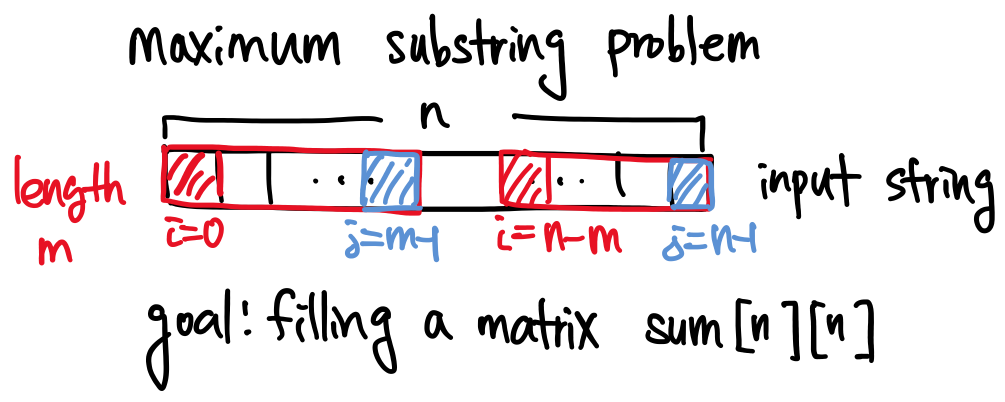

In [ ]:
start = time.time()

input = "142124"
def DP_maxSubStringLength(s):
  n = len(s)
  maxlen = 0
  sum = [[0]*n for i in range(n)]
  # sum[i][j] indicates sum of numbers from ith position to jth position
  for i in range(n):
    sum[i][i] = int(s[i])
  
  for length in range(2,n+1):
    for i in range(n-length+1):
      j = i+length-1
      k = length//2
      sum[i][j] = sum[i][j-k] + sum[j-k+1][j]

      if length%2==0 and sum[i][j-k]==sum[j-k+1][j] and length > maxlen:
        maxlen = length
    
  return maxlen
DP_maxSubStringLength(input)

print("time :", time.time() - start)

time : 0.0002827644348144531


# 3. Dynamic Programming Examples

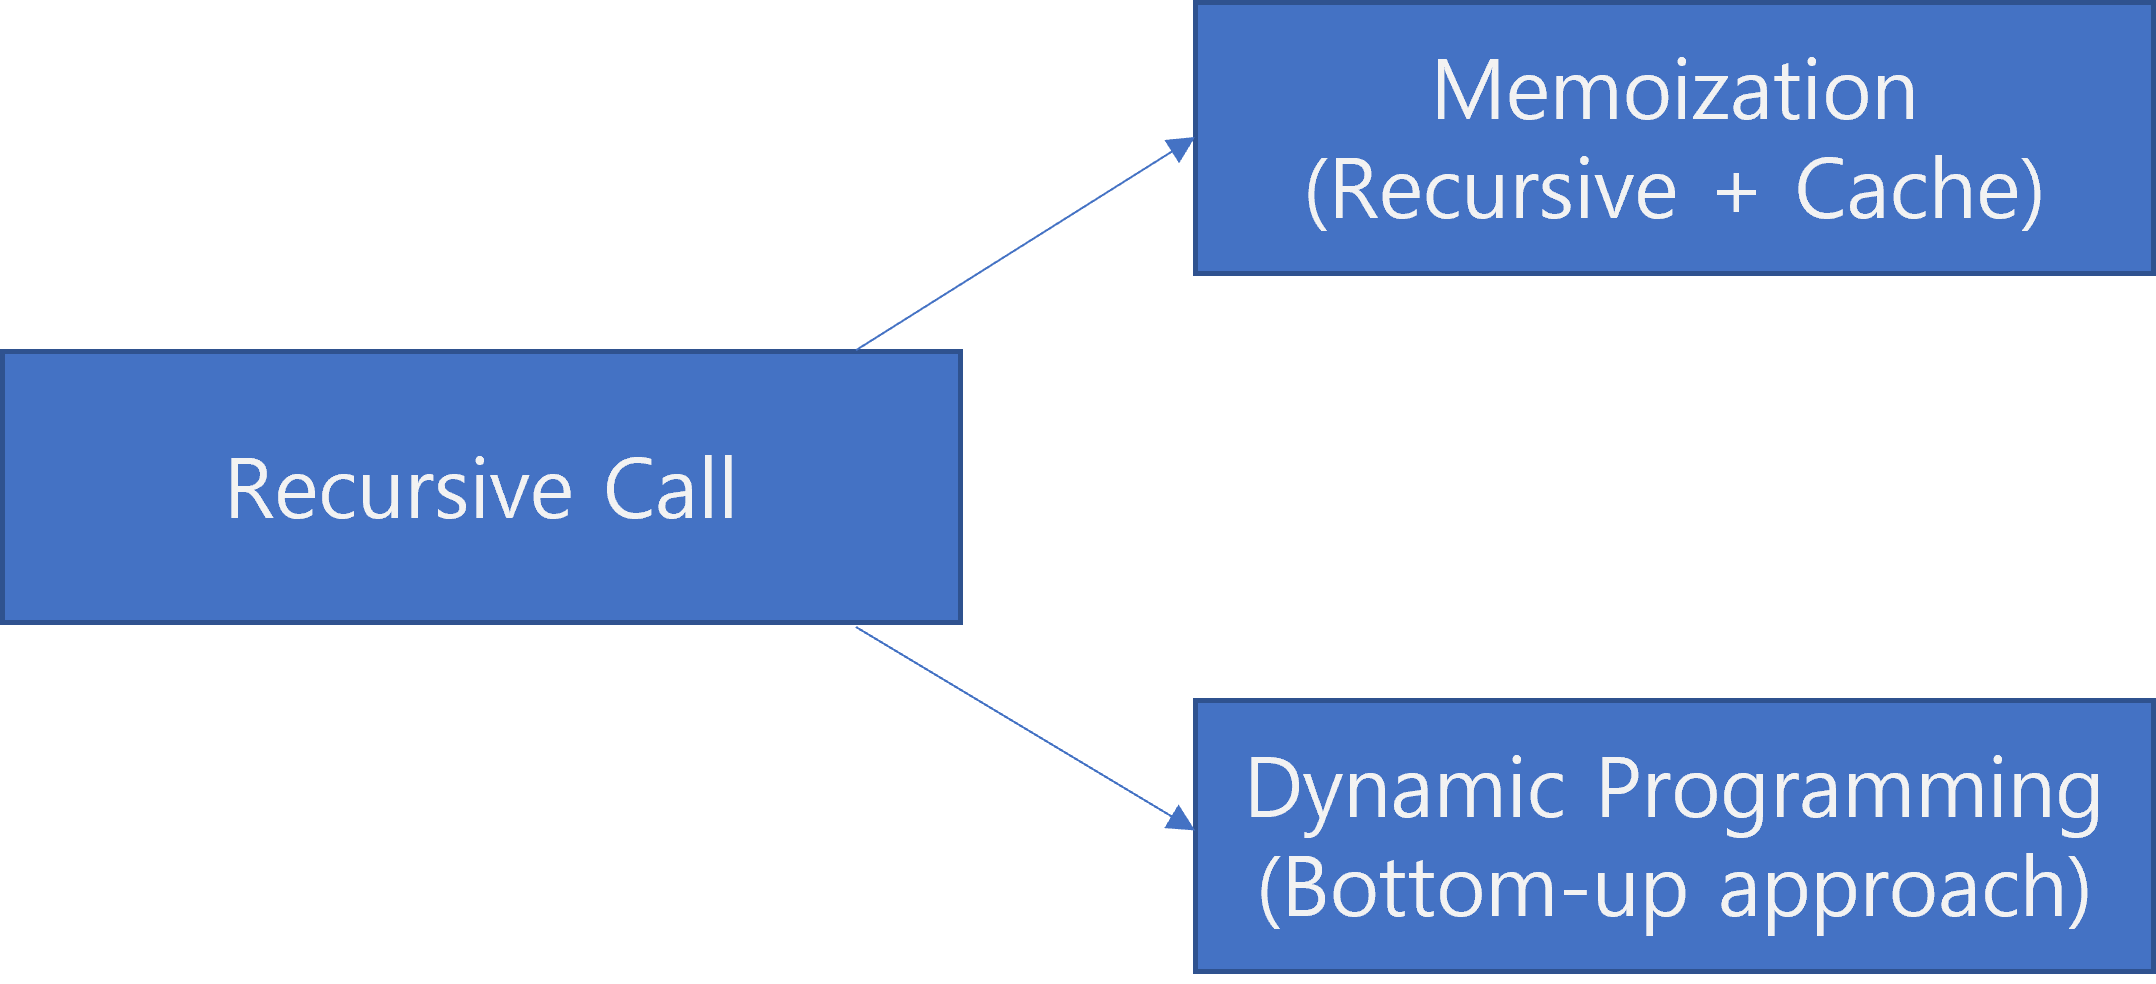

## 3.1 Minimum Cost Movement in 2D Matrix

2차원 비용 행렬이 주어져 있을 때, 시작점 [0][0] 에서 [i][j]까지 도달하기 위한 최소 비용을 구하기 <br/>
- Recursive Call
- Memoization
- Dynamic Programming

### Recursive Call

In [ ]:
def getMin(x,y):
  if x<y:
    return x
  return y
def minPathCost(cost, m, n):
  if m==0 and n==0:
    return cost[0][0]
  if m==0:
    return minPathCost(cost, 0, n-1)+cost[0][n]
  if n==0:
    return minPathCost(cost, m-1, 0)+cost[m][0]
  x = minPathCost(cost, m-1,n)
  y = minPathCost(cost, m, n-1)
  return getMin(x,y) + cost[m][n]

cost = [[1,3,5,8],[4,2,1,7],[4,3,2,3]]

minPathCost(cost,2,3)

12

### Memoization

In [ ]:
MEM = [[0]*4 for i in range(3)]
MEM

[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]

In [ ]:
def getMin(x,y):
  if x<y:
    return x
  return y
def minPathCost2(cost, m, n):
  if MEM[m][n]!=0:
    return MEM[m][n]

  if m==0 and n==0:
    MEM[m][n] = cost[0][0]
  elif m==0:
    MEM[m][n] =  minPathCost2(cost, 0, n-1)+cost[0][n]
  elif n==0:
   MEM[m][n] = minPathCost2(cost, m-1, 0)+cost[m][0]
  else:
    x = minPathCost2(cost, m-1,n)
    y = minPathCost2(cost, m, n-1)
    MEM[m][n] = getMin(x,y) + cost[m][n]
  
  return MEM[m][n]

cost = [[1,3,5,8],[4,2,1,7],[4,3,2,3]]
minPathCost2(cost,2,3)

12

In [ ]:
for row in MEM:
  for entry in row:
    print(entry, end="  ")
  print("\n--------")

1  4  9  17  
--------
5  6  7  14  
--------
9  9  9  12  
--------


### Bottom-Up Dynamic programming

In [ ]:
MEM = [[0]*4 for i in range(3)]
MEM

[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]

In [ ]:
def getMin(x,y):
  if x<y:
    return x
  return y
def minPathCost3(cost, m, n):
  MEM[0][0] = cost[0][0]
  
  for i in range(1,m+1):
    MEM[i][0] = MEM[i-1][0] + cost[i][0]
  
  for j in range(1,n+1):
    MEM[0][j] = MEM[0][j-1] + cost[0][j]
  
  for i in range(1,m+1):
    for j in range(1,n+1):
      MEM[i][j] = getMin(MEM[i-1][j], MEM[i][j-1]) + cost[i][j]

  return MEM[i][j]

cost = [[1,3,5,8],[4,2,1,7],[4,3,2,3]]
minPathCost3(cost,2,3)

12

In [ ]:
for row in MEM:
  for entry in row:
    print(entry, end="  ")
  print("\n--------")

1  4  9  17  
--------
5  6  7  14  
--------
9  9  9  12  
--------


## 3.2 Maximum Sum of Consequent Sub-sequence

### Brute-Force Approach

In [ ]:
seq = [-2,-3,4,-1,-2,1,5,-3]

def maxSubArraySum(seq):
  n = len(seq)
  maxSum = min(seq)
  curSum = 0

  for i in range(n):
    curSum = 0
    for j in range(i,n):
      curSum += seq[j]
      if curSum > maxSum:
        maxSum = curSum
  
  return maxSum

print(maxSubArraySum(seq))

7


### Kadane's Algorithm

Kadane's Algorithm은 두 변수를 갱신하면서 배열의 원소를 정확히 한 번만 참조하는 알고리즘이다. <br/>
*Idea : 만약 배열의 i번째 숫자부터 j번째 숫자까지의 합이 음수라면, 배열의 i번재 숫자부터 j+1번째 숫자까지의 합이 배열의 j+1번째 값보다 작으므로, 이전까지의 합을 무시할 수 있다.*

*Can we call it dynamic programming? <br/>*
- 카데인 알고리즘은 큰 문제를 작은 문제로 쪼갠다는 관점에서, 하위 구조 특성을 가진다(점화식을 보면).
  - 이 관점에서는 DP가 아니라, 재귀 문제라고 주장할 수 있다.
- 하지만,  재귀 호출 과정에서 DP를 사용하므로 하위 문제의 실제적인 반복 게산은 일어나지 않는다.
  - 이 관점에서는 DP라고 주장할 수 있다.


In [ ]:
seq = [-2,-3,4,-1,-2,1,5,-3]

def maxSubArraySum2(seq):
  n = len(seq)
  maxSumSoFar = 0 #지금까지 부분합의 최댓값
  maxSumEndingHere = 0 #현재가 끝나는 지점이 되는 부분합의 최댓값
  for i in range(n):
    maxSumEndingHere += seq[i]
    
    if maxSumEndingHere < 0:
      maxSumEndingHere = 0
    
    if maxSumSoFar < maxSumEndingHere:
      maxSumSoFar = maxSumEndingHere
    
  return maxSumSoFar

print(maxSubArraySum2(seq))

7


# 4. Dynamic Programming Challenges

## 4.1 최소 교정 비용 문제
Input : str1, str2 <br/>
Output : find the series of operations that makes least cost

### Recursive Call Approach

In [ ]:
# 글자에서 사용 가능한 세 연산 : Insertion, Deletion, Substitution
